In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),
                        activation='relu')) # (32*9)+32 = 320
model.add(layers.Conv2D(64, (3,3), activation='relu')) # (64*9*32)+64 = 18496
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25)) # 임의의 노드를 오프시킨다.
model.add(layers.Flatten()) # 2차원 배열에서 1차원으로 바꾼다.
model.add(layers.Dense(128, activation='relu')) # 9216*128+128 = 1179776
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 128*10+10 = 1290

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

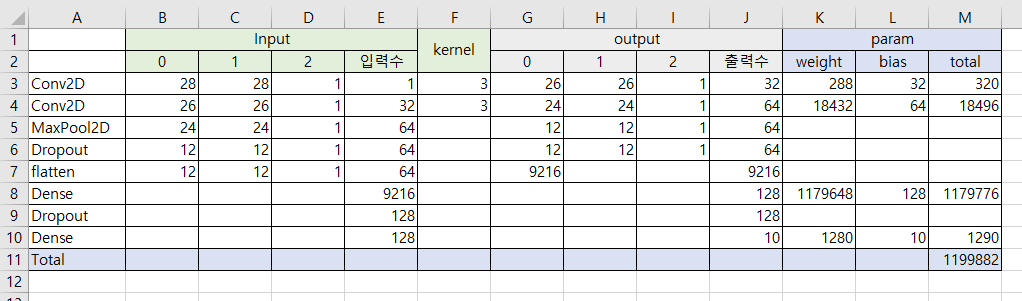

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

modelpath = 'data/model/MNIST.hdf5'
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                             verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25,
                   epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping, checkpoint])


Epoch 00001: val_loss improved from inf to 0.07620, saving model to data/model\MNIST.hdf5

Epoch 00002: val_loss improved from 0.07620 to 0.05656, saving model to data/model\MNIST.hdf5

Epoch 00003: val_loss improved from 0.05656 to 0.05352, saving model to data/model\MNIST.hdf5

Epoch 00004: val_loss improved from 0.05352 to 0.04544, saving model to data/model\MNIST.hdf5

Epoch 00005: val_loss improved from 0.04544 to 0.04326, saving model to data/model\MNIST.hdf5

Epoch 00006: val_loss improved from 0.04326 to 0.04152, saving model to data/model\MNIST.hdf5

Epoch 00007: val_loss did not improve from 0.04152

Epoch 00008: val_loss did not improve from 0.04152

Epoch 00009: val_loss improved from 0.04152 to 0.03962, saving model to data/model\MNIST.hdf5

Epoch 00010: val_loss did not improve from 0.03962

Epoch 00011: val_loss did not improve from 0.03962

Epoch 00012: val_loss did not improve from 0.03962

Epoch 00013: val_loss did not improve from 0.03962

Epoch 00014: val_loss did 

In [11]:
print("\n Test Accuracy: " , model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0373 - accuracy: 0.9907

 Test Accuracy:  0.9907000064849854


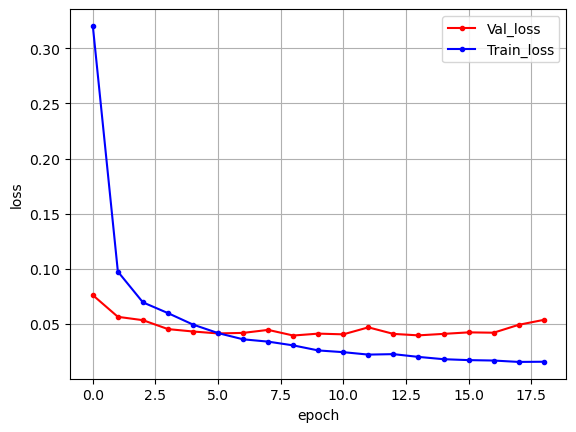

In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c="red", label='Val_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train_loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()